# Naive Bayes Email Project

In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [2]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# โหลดชุดข้อมูล (กรณีที่อัปโหลดแล้ว)
import io
data = pd.read_csv(io.BytesIO(uploaded['spam_ham_dataset.csv']))

# ลบคอลัมน์ที่ไม่จำเป็น
data = data.drop(columns=["Unnamed: 0"])

# ตรวจสอบข้อมูล
print(data.head(10))


  label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs\r\nthis deal is t...          0
5   ham  Subject: ehronline web address change\r\nthis ...          0
6   ham  Subject: spring savings certificate - take 30 ...          0
7  spam  Subject: looking for medication ? we ` re the ...          1
8   ham  Subject: noms / actual flow for 2 / 26\r\nwe a...          0
9   ham  Subject: nominations for oct . 21 - 23 , 2000\...          0


In [5]:
# ตัวแปรอิสระ X คือคอลัมน์ text และตัวแปรเป้าหมาย y คือคอลัมน์ label_num
X = data['text']
y = data['label_num']

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# แปลงข้อความให้เป็นเวกเตอร์ของความถี่ของคำ (Bag of Words)
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)



In [7]:
# สร้างโมเดล Naive Bayes
model = MultinomialNB()

# ฝึกโมเดลกับข้อมูล
model.fit(X_train_transformed, y_train)

# ทำนายผลลัพธ์บนชุดข้อมูลทดสอบ
y_pred = model.predict(X_test_transformed)


In [8]:
# ประเมินผลลัพธ์ด้วย accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9719806763285024


In [9]:
# รายงานผลการจำแนกประเภท
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [10]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)



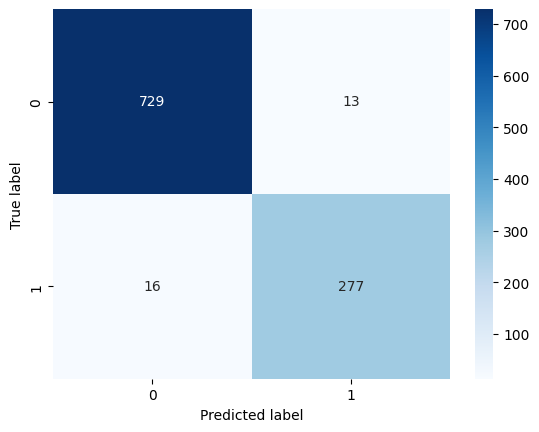

In [11]:
# แสดง Confusion Matrix ด้วย heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
# รายงานผลการจำแนกประเภทหลังจากการทำcross validation

# ทำ Cross Validation (สมมติใช้ 5 folds)
scores = cross_val_score(model, X_train_transformed, y_train, cv=5)

# แสดงผลคะแนนของแต่ละ fold
print("Cross Validation Scores:", scores)

# แสดงค่าเฉลี่ยของคะแนน Cross Validation
print("Average CV Score:", scores.mean())

# สร้างโมเดลและฝึกโมเดลอีกครั้ง (เพื่อใช้ในการรายงานผลลัพธ์)
model.fit(X_train_transformed, y_train)

# ทำนายผลลัพธ์บนชุดข้อมูลทดสอบ
y_pred = model.predict(X_test_transformed)

# รายงานผลการจำแนกประเภทหลังจาก Cross Validation
print("\nClassification Report after Cross Validation:")
print(classification_report(y_test, y_pred))


Cross Validation Scores: [0.98067633 0.97944377 0.97339782 0.97460701 0.99274486]
Average CV Score: 0.9801739597754529

Classification Report after Cross Validation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



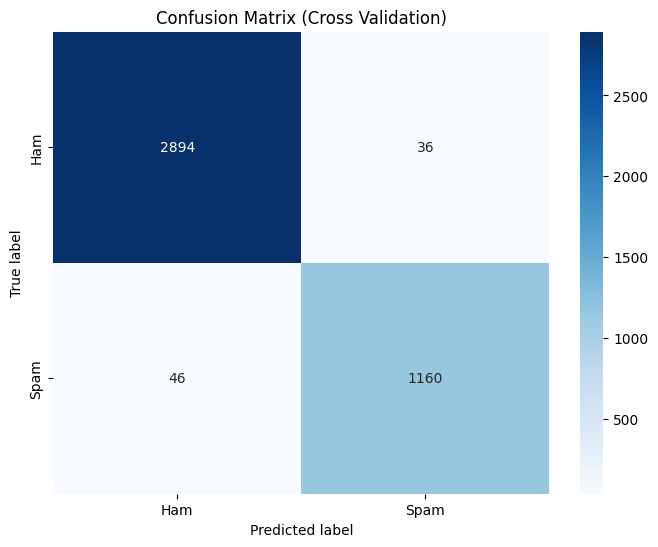

In [15]:
# prompt: แสดง Confusion Matrix ด้วย heatmap หลังจากที่ทำ Cross Validation หน่อยครับ

from sklearn.model_selection import cross_val_predict

# ทำนายผลลัพธ์ด้วย Cross Validation
y_pred_cv = cross_val_predict(model, X_train_transformed, y_train, cv=5)

# สร้าง Confusion Matrix จากผลลัพธ์ Cross Validation
cm_cv = confusion_matrix(y_train, y_pred_cv)

# แสดง Confusion Matrix ด้วย heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix (Cross Validation)')
plt.show()

# โค้ดตัวอย่างในการทำนายอีเมลใหม่:


In [16]:
# ข้อความอีเมลใหม่ที่คุณต้องการให้โมเดลทำนาย
new_email = ["Win a free trip to Hawaii! Just click here to claim your prize."]

# ใช้ vectorizer ที่เคย fit จาก X_train แปลงข้อความใหม่ (แปลงโดยใช้ transform เท่านั้น)
new_email_transformed = vectorizer.transform(new_email)

# ทำนายผลลัพธ์โดยใช้โมเดลที่ฝึกไว้แล้ว
prediction = model.predict(new_email_transformed)

# แสดงผลลัพธ์
if prediction[0] == 1:
    print("ผลลัพธ์: Spam")
else:
    print("ผลลัพธ์: Ham (Not Spam)")


ผลลัพธ์: Spam
